In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.4/616.4 kB 8.1 MB/s eta 0:00:00


ClearML - удобфный инструмент для трекинга экспериментов. На наше счастье он интегрирован в 8 Yolo

In [4]:
!pip install -q clearml
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=6UT3J7FZ01WRYEYQGBV5
%env CLEARML_API_SECRET_KEY=fkJFdjGnPcl9UoD0BJKTMT1vafVbBrp2pgiygGL7IysldqoG3z

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.8 MB/s eta 0:00:00
env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=6UT3J7FZ01WRYEYQGBV5
env: CLEARML_API_SECRET_KEY=fkJFdjGnPcl9UoD0BJKTMT1vafVbBrp2pgiygGL7IysldqoG3z


Ниже загрузка из робофлоу. Когда экспортируешь можно выбрать как код для ноутбука и скопировать приведенный ниже кусок кода

In [5]:
!pip install -q roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kE0WtSa77DQ55B76BGRC")
project = rf.workspace("project-csjvq").project("this_the_last")
dataset = project.version(2).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.4 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.178, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to this_the_last-2 in yolov8:: 100%|██████████| 301/301 [00:00<00:00, 9566.68it/s]


Ниже команда тренировки yolo на детекцию (ограничивающая рамка). Для этой модели размечаем данные прямоугольниками и детектирует она соответственно прямоугольниками.

yolov8n.pt - маленькая моделька (работает быстро, точность меньше, чем у средней), yolov8m.pt - средняя и yolov8x.pt - самая большая

```
names:
- rails
nc: 1
roboflow:
  license: CC BY 4.0
  project: this_the_last
  url: https://universe.roboflow.com/project-csjvq/this_the_last/dataset/2
  version: 2
  workspace: project-csjvq
test: /content/drive/MyDrive/AI/Test  # Если у вас есть тестовый набор, укажите путь здесь
train: /content/this_the_last-2/train/images
val: /content/this_the_last-2/valid/images
```

для сегментации используем модели с окончанием -seg

In [6]:
!yolo task=segment mode=train model=yolov8x-seg.pt imgsz=250 data="/content/this_the_last-2/data.yaml" epochs=40 batch=16 name="MY_SEG"

100% 137M/137M [00:02<00:00, 67.9MB/s]
Ultralytics YOLOv8.0.178 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/this_the_last-2/data.yaml, epochs=40, patience=50, batch=16, imgsz=250, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=MY_SEG, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

Ниже команда для предсказаний

In [20]:
!yolo segment predict model=/content/runs/segment/MY_SEG/weights/best.pt source='/content/drive/MyDrive/AI/Test/3122ia.jpg' imgsz=640 conf=0.2
!yolo segment predict model=/content/runs/segment/MY_SEG/weights/best.pt source='/content/drive/MyDrive/AI/Test/2554ia.jpg' imgsz=640 conf=0.2
!yolo segment predict model=/content/runs/segment/MY_SEG/weights/best.pt source='/content/drive/MyDrive/AI/Test/2556ia.jpg' imgsz=640 conf=0.2

Ultralytics YOLOv8.0.178 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/AI/Test/3122ia.jpg: 384x640 23 railss, 79.9ms
Speed: 2.4ms preprocess, 79.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict13
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics YOLOv8.0.178 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/AI/Test/2554ia.jpg: 384x640 12 railss, 122.2ms
Speed: 3.7ms preprocess, 122.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict14
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics YOLOv8.0.178 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 l

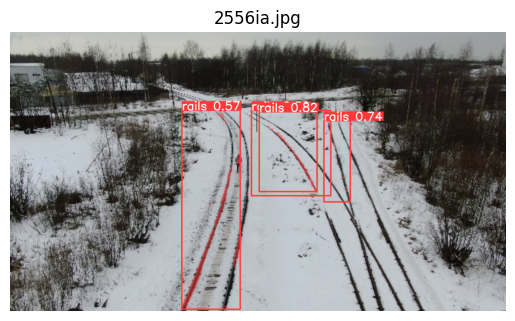

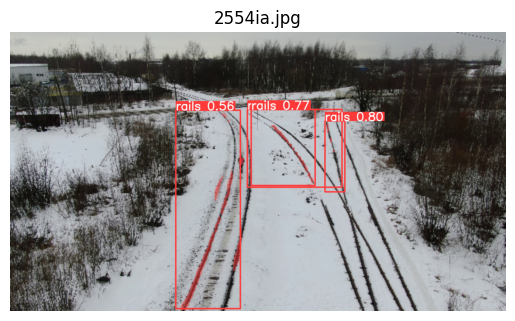

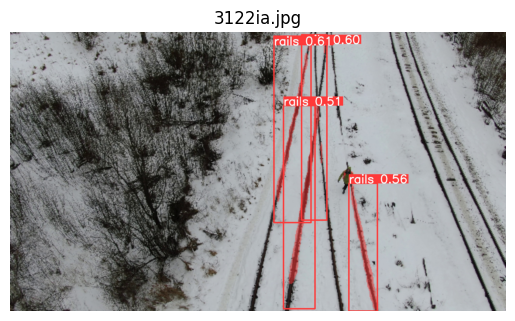

In [21]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Путь к директории segment
segment_path = '/content/runs/segment/'

# Получаем список всех директорий predict*
predict_dirs = sorted([d for d in os.listdir(segment_path) if d.startswith('predict')], reverse=True)

# Визуализируем изображения из последних трех директорий predict (поскольку мы выполнили три предсказания)
for predict_dir in predict_dirs[:3]:
    predict_path = os.path.join(segment_path, predict_dir)
    images = [img for img in os.listdir(predict_path) if img.endswith(('.png', '.jpg', '.jpeg'))]

    for image in images:
        img_path = os.path.join(predict_path, image)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(image)
        plt.axis('off')
        plt.show()